In [185]:
#pip install pandas OpenBlender scikit-learn
#pip install tensorflow

In [186]:
import warnings
warnings.filterwarnings('ignore')

import nltk
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [187]:
'''token = '621bd93e9516291fadccaea5AVFN4rSSNmyghGLpu6u9NBmNRphWDV'
action = 'API_getObservationsFromDataset'
parameters = { 
    'token' : token,
    'id_dataset' : '5d4c3af79516290b01c83f51',
    'sample_size':2811,   
}
df_bitcoin = pd.read_json(json.dumps(OpenBlender.call(action, parameters)['sample']), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)
df_bitcoin.reset_index(drop=True, inplace=True)
df_bitcoin['date'] = [OpenBlender.unixToDate(ts, timezone = 'GMT') for ts in df_bitcoin.timestamp]
df_bitcoin = df_bitcoin.drop('timestamp', axis = 1)
df_bitcoin'''

"token = '621bd93e9516291fadccaea5AVFN4rSSNmyghGLpu6u9NBmNRphWDV'\naction = 'API_getObservationsFromDataset'\nparameters = { \n    'token' : token,\n    'id_dataset' : '5d4c3af79516290b01c83f51',\n    'sample_size':2811,   \n}\ndf_bitcoin = pd.read_json(json.dumps(OpenBlender.call(action, parameters)['sample']), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)\ndf_bitcoin.reset_index(drop=True, inplace=True)\ndf_bitcoin['date'] = [OpenBlender.unixToDate(ts, timezone = 'GMT') for ts in df_bitcoin.timestamp]\ndf_bitcoin = df_bitcoin.drop('timestamp', axis = 1)\ndf_bitcoin"

In [188]:
'''token = '6219235f9516292d6a055228wa5Vo6VaFIreOf50OUDBm7oTf515s3'
action = 'API_getObservationsFromDataset'
parameters = { 
    'token' : token,
    'id_dataset' : '5d4c83f79516290b01c8fe6e',
    'sample_size':1825
}
df_ether = pd.read_json(json.dumps(OpenBlender.call(action, parameters)['sample']), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)
df_ether.reset_index(drop=True, inplace=True)
df_ether['date'] = [OpenBlender.unixToDate(ts, timezone = 'GMT') for ts in df_ether.timestamp]
df_ether = df_ether.drop('timestamp', axis = 1)
df_ether'''

"token = '6219235f9516292d6a055228wa5Vo6VaFIreOf50OUDBm7oTf515s3'\naction = 'API_getObservationsFromDataset'\nparameters = { \n    'token' : token,\n    'id_dataset' : '5d4c83f79516290b01c8fe6e',\n    'sample_size':1825\n}\ndf_ether = pd.read_json(json.dumps(OpenBlender.call(action, parameters)['sample']), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)\ndf_ether.reset_index(drop=True, inplace=True)\ndf_ether['date'] = [OpenBlender.unixToDate(ts, timezone = 'GMT') for ts in df_ether.timestamp]\ndf_ether = df_ether.drop('timestamp', axis = 1)\ndf_ether"

In [189]:
df_bitcoin_init = pd.read_csv('C:/Users/tuhina2/Desktop/Text Analytics/Project/Final_Project Submission/csv_files/Bitcoinlatest.csv')
df_ether_init= pd.read_csv('C:/Users/tuhina2/Desktop/Text Analytics/Project/Final_Project Submission/csv_files/Ethereumlatest.csv')

In [190]:
df_bitcoin_polar=df_bitcoin_init
df_bitcoin_polar['log_diff'] = np.log(df_bitcoin_polar['price']) - np.log(df_bitcoin_polar['open'])
df_bitcoin_polar

,volume,price,high,low,open,change,date,log_diff
0,2.75K,49264.0,49487.0,48121.0,48868.0,0.81%,22-08-2021 17:00:00,0.008071
1,21.16K,49747.0,51154.0,48120.6,49725.0,0.04%,13-05-2021 17:00:00,0.000442
2,14.96K,49725.0,57688.0,49725.0,56715.0,-12.32%,12-05-2021 17:00:00,-0.131531
3,7.69K,56715.0,56724.0,54789.0,55851.0,1.55%,11-05-2021 17:00:00,0.015351
4,13.49K,55851.0,59454.3,55448.0,58276.0,-4.16%,10-05-2021 17:00:00,-0.042503
...,...,...,...,...,...,...,...,...
2806,-,13.4,13.4,13.4,13.4,-0.44%,05-01-2013 16:00:00,0.000000
2807,-,13.5,13.5,13.5,13.5,0.75%,04-01-2013 16:00:00,0.000000
2808,-,13.4,13.4,13.4,13.4,0.90%,03-01-2013 16:00:00,0.000000
2809,-,13.3,13.3,13.3,13.3,0.00%,02-01-2013 16:00:00,0.000000


In [191]:
df_ether_polar=df_ether_init
df_ether_polar['log_diff'] = np.log(df_ether_polar['price']) - np.log(df_ether_polar['open'])
df_ether_polar

,volume,price,high,low,open,change,date,log_diff
0,418.49K,2776.37,2856.11,2734.80,2768.64,0.33%,26-02-2022 17:00:00,0.002788
1,679.41K,2767.33,2829.99,2573.23,2599.00,6.59%,25-02-2022 17:00:00,0.062756
2,1.40M,2596.16,2734.17,2302.82,2578.87,0.70%,24-02-2022 17:00:00,0.006682
3,504.19K,2578.09,2749.47,2578.09,2641.33,-2.24%,23-02-2022 17:00:00,-0.024234
4,692.64K,2637.25,2662.71,2501.02,2569.18,2.60%,22-02-2022 17:00:00,0.026150
...,...,...,...,...,...,...,...,...
1820,26.34K,12.50,15.07,11.40,15.07,-17.05%,14-03-2016 16:00:00,-0.186977
1821,0.37K,15.07,15.07,12.92,12.92,16.64%,13-03-2016 16:00:00,0.153930
1822,0.24K,12.92,13.45,11.95,11.95,8.12%,12-03-2016 16:00:00,0.078045
1823,0.05K,11.95,11.95,11.75,11.75,1.70%,11-03-2016 16:00:00,0.016878


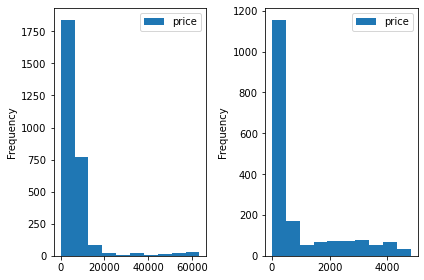

In [192]:
fig, axes = plt.subplots(nrows=1,ncols=2)
df_bitcoin_polar.plot(ax = axes[0],x="date",y="price", subplots=True,kind="hist") 
df_ether_polar.plot(ax = axes[1],x="date",y="price", subplots=True,kind="hist")
fig.tight_layout()
plt.show()
#df_bitcoin_polar.to_csv ('C:/Users/tuhina2/Desktop/PriceB.csv', index = False, header=True)
#df_ether_polar.to_csv ('C:/Users/tuhina2/Desktop/PriceE.csv', index = False, header=True)

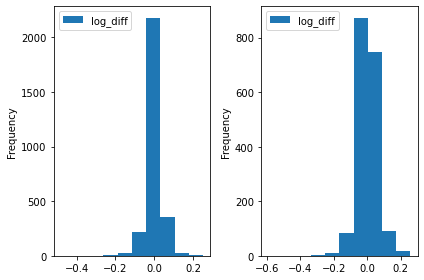

In [193]:
fig, axes = plt.subplots(nrows=1,ncols=2)
df_bitcoin_polar.plot(ax = axes[0],x="date",y="log_diff", subplots=True,kind="hist") 
df_ether_polar.plot(ax = axes[1],x="date",y="log_diff", subplots=True,kind="hist")
fig.tight_layout()
plt.show()


In [194]:
df_bitcoin_polar['target'] = [1 if log_diff > 0 else 0 for log_diff in df_bitcoin_polar['log_diff']]
df_bitcoin_polar

,volume,price,high,low,open,change,date,log_diff,target
0,2.75K,49264.0,49487.0,48121.0,48868.0,0.81%,22-08-2021 17:00:00,0.008071,1
1,21.16K,49747.0,51154.0,48120.6,49725.0,0.04%,13-05-2021 17:00:00,0.000442,1
2,14.96K,49725.0,57688.0,49725.0,56715.0,-12.32%,12-05-2021 17:00:00,-0.131531,0
3,7.69K,56715.0,56724.0,54789.0,55851.0,1.55%,11-05-2021 17:00:00,0.015351,1
4,13.49K,55851.0,59454.3,55448.0,58276.0,-4.16%,10-05-2021 17:00:00,-0.042503,0
...,...,...,...,...,...,...,...,...,...
2806,-,13.4,13.4,13.4,13.4,-0.44%,05-01-2013 16:00:00,0.000000,0
2807,-,13.5,13.5,13.5,13.5,0.75%,04-01-2013 16:00:00,0.000000,0
2808,-,13.4,13.4,13.4,13.4,0.90%,03-01-2013 16:00:00,0.000000,0
2809,-,13.3,13.3,13.3,13.3,0.00%,02-01-2013 16:00:00,0.000000,0


In [195]:
df_ether_polar['target'] = [1 if log_diff > 0 else 0 for log_diff in df_ether_polar['log_diff']]
df_ether_polar

,volume,price,high,low,open,change,date,log_diff,target
0,418.49K,2776.37,2856.11,2734.80,2768.64,0.33%,26-02-2022 17:00:00,0.002788,1
1,679.41K,2767.33,2829.99,2573.23,2599.00,6.59%,25-02-2022 17:00:00,0.062756,1
2,1.40M,2596.16,2734.17,2302.82,2578.87,0.70%,24-02-2022 17:00:00,0.006682,1
3,504.19K,2578.09,2749.47,2578.09,2641.33,-2.24%,23-02-2022 17:00:00,-0.024234,0
4,692.64K,2637.25,2662.71,2501.02,2569.18,2.60%,22-02-2022 17:00:00,0.026150,1
...,...,...,...,...,...,...,...,...,...
1820,26.34K,12.50,15.07,11.40,15.07,-17.05%,14-03-2016 16:00:00,-0.186977,0
1821,0.37K,15.07,15.07,12.92,12.92,16.64%,13-03-2016 16:00:00,0.153930,1
1822,0.24K,12.92,13.45,11.95,11.95,8.12%,12-03-2016 16:00:00,0.078045,1
1823,0.05K,11.95,11.95,11.75,11.75,1.70%,11-03-2016 16:00:00,0.016878,1


In [196]:
'''format = '%d-%m-%Y %H:%M:%S'
timezone = 'GMT'
df_bitcoin_polar['u_timestamp'] = OpenBlender.dateToUnix(df_bitcoin_polar['date'], 
                                           date_format = format, 
                                           timezone = timezone)
df_bitcoin_polar = df_bitcoin_polar[['date', 'u_timestamp', 'price', 'target']]
df_bitcoin_polar.head()'''

"format = '%d-%m-%Y %H:%M:%S'\ntimezone = 'GMT'\ndf_bitcoin_polar['u_timestamp'] = OpenBlender.dateToUnix(df_bitcoin_polar['date'], \n                                           date_format = format, \n                                           timezone = timezone)\ndf_bitcoin_polar = df_bitcoin_polar[['date', 'u_timestamp', 'price', 'target']]\ndf_bitcoin_polar.head()"

In [197]:
'''format = '%d-%m-%Y %H:%M:%S'
timezone = 'GMT'
df_ether_polar['u_timestamp'] = OpenBlender.dateToUnix(df_ether_polar['date'], 
                                           date_format = format, 
                                           timezone = timezone)
df_ether_polar= df_ether_polar[['date', 'u_timestamp', 'price', 'target']]
df_ether_polar.head()'''

"format = '%d-%m-%Y %H:%M:%S'\ntimezone = 'GMT'\ndf_ether_polar['u_timestamp'] = OpenBlender.dateToUnix(df_ether_polar['date'], \n                                           date_format = format, \n                                           timezone = timezone)\ndf_ether_polar= df_ether_polar[['date', 'u_timestamp', 'price', 'target']]\ndf_ether_polar.head()"

In [198]:
'''search_keyword = 'Crypto'
df_bitcoin_polar = df_bitcoin_polar.sort_values('u_timestamp').reset_index(drop = True)
print('From : ' + OpenBlender.unixToDate(min(df_bitcoin_polar.u_timestamp)))
print('Until: ' + OpenBlender.unixToDate(max(df_bitcoin_polar.u_timestamp)))
OpenBlender.searchTimeBlends(token,
                            df_bitcoin_polar.u_timestamp,
                             search_keyword)'''

"search_keyword = 'Crypto'\ndf_bitcoin_polar = df_bitcoin_polar.sort_values('u_timestamp').reset_index(drop = True)\nprint('From : ' + OpenBlender.unixToDate(min(df_bitcoin_polar.u_timestamp)))\nprint('Until: ' + OpenBlender.unixToDate(max(df_bitcoin_polar.u_timestamp)))\nOpenBlender.searchTimeBlends(token,\n                            df_bitcoin_polar.u_timestamp,\n                             search_keyword)"

In [199]:
'''search_keyword = 'Crypto'
df_ether_polar = df_ether_polar.sort_values('u_timestamp').reset_index(drop = True)
print('From : ' + OpenBlender.unixToDate(min(df_ether_polar.u_timestamp)))
print('Until: ' + OpenBlender.unixToDate(max(df_ether_polar.u_timestamp)))
OpenBlender.searchTimeBlends(token,
                            df_ether_polar.u_timestamp,
                             search_keyword)'''

"search_keyword = 'Crypto'\ndf_ether_polar = df_ether_polar.sort_values('u_timestamp').reset_index(drop = True)\nprint('From : ' + OpenBlender.unixToDate(min(df_ether_polar.u_timestamp)))\nprint('Until: ' + OpenBlender.unixToDate(max(df_ether_polar.u_timestamp)))\nOpenBlender.searchTimeBlends(token,\n                            df_ether_polar.u_timestamp,\n                             search_keyword)"

In [200]:
'''blend_source = {
                'id_dataset':'5ea209c495162936348f13eb',
                'feature' : 'text'
            }

# Now, let's 'timeBlend' it to our dataset
df_bitcoin_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df_bitcoin_polar.u_timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df_bitcoin_polar = pd.concat([df_bitcoin_polar, df_bitcoin_blend.loc[:, df_bitcoin_blend.columns != 'u_timestamp']], axis = 1)
df_bitcoin_polar'''

"blend_source = {\n                'id_dataset':'5ea209c495162936348f13eb',\n                'feature' : 'text'\n            }\n\n# Now, let's 'timeBlend' it to our dataset\ndf_bitcoin_blend = OpenBlender.timeBlend( token = token,\n                                  anchor_ts = df_bitcoin_polar.u_timestamp,\n                                  blend_source = blend_source,\n                                  blend_type = 'agg_in_intervals',\n                                  interval_size = 60 * 60 * 24,\n                                  direction = 'time_prior',\n                                  interval_output = 'list',\n                                  missing_values = 'raw')\ndf_bitcoin_polar = pd.concat([df_bitcoin_polar, df_bitcoin_blend.loc[:, df_bitcoin_blend.columns != 'u_timestamp']], axis = 1)\ndf_bitcoin_polar"

In [201]:
'''blend_source = {
                'id_dataset':'5ea209c495162936348f13eb',
                'feature' : 'text'
            }

# Now, let's 'timeBlend' it to our dataset
df_ether_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df_ether_polar.u_timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df_ether_polar = pd.concat([df_ether_polar, df_ether_blend.loc[:, df_ether_blend.columns != 'u_timestamp']], axis = 1)
df_ether_polar'''

"blend_source = {\n                'id_dataset':'5ea209c495162936348f13eb',\n                'feature' : 'text'\n            }\n\n# Now, let's 'timeBlend' it to our dataset\ndf_ether_blend = OpenBlender.timeBlend( token = token,\n                                  anchor_ts = df_ether_polar.u_timestamp,\n                                  blend_source = blend_source,\n                                  blend_type = 'agg_in_intervals',\n                                  interval_size = 60 * 60 * 24,\n                                  direction = 'time_prior',\n                                  interval_output = 'list',\n                                  missing_values = 'raw')\ndf_ether_polar = pd.concat([df_ether_polar, df_ether_blend.loc[:, df_ether_blend.columns != 'u_timestamp']], axis = 1)\ndf_ether_polar"

In [202]:
df_bitcoin_new_polar = pd.read_csv('C:/Users/tuhina2/Desktop/Text Analytics/Project/Final_Project Submission/csv_files/Bitcoinwithtext.csv')
df_bitcoin_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,CRYPTOCURR.text_last1days
0,01-01-2013 16:00:00,1.357056e+09,13.3,0,1357056000,0,[]
1,02-01-2013 16:00:00,1.357142e+09,13.3,0,1357142400,0,[]
2,03-01-2013 16:00:00,1.357229e+09,13.4,0,1357228800,0,[]
3,04-01-2013 16:00:00,1.357315e+09,13.5,0,1357315200,0,[]
4,05-01-2013 16:00:00,1.357402e+09,13.4,0,1357401600,0,[]
...,...,...,...,...,...,...,...
2806,10-05-2021 17:00:00,1.620666e+09,55851.0,0,1620666000,7,['happy monday crypto twitter ethereum now ove...
2807,11-05-2021 17:00:00,1.620752e+09,56715.0,1,1620752400,5,['druckenmiller says within 15 years the us do...
2808,12-05-2021 17:00:00,1.620839e+09,49725.0,0,1620838800,11,['coinbase is the most downloaded app on the a...
2809,13-05-2021 17:00:00,1.620925e+09,49747.0,1,1620925200,9,['they also had the fossil fuels fud in 1999 b...


In [203]:
df_ether_new_polar = pd.read_csv('C:/Users/tuhina2/Desktop/Text Analytics/Project/Final_Project Submission/csv_files/Ethereumwithtext.csv')
df_ether_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,CRYPTOCURR.text_last1days
0,10-03-2016 16:00:00,1.457626e+09,11.75,1,1457625600,0,[]
1,11-03-2016 16:00:00,1.457712e+09,11.95,1,1457712000,0,[]
2,12-03-2016 16:00:00,1.457798e+09,12.92,1,1457798400,0,[]
3,13-03-2016 16:00:00,1.457885e+09,15.07,1,1457884800,0,[]
4,14-03-2016 16:00:00,1.457971e+09,12.50,0,1457971200,0,[]
...,...,...,...,...,...,...,...
1820,20-02-2022 17:00:00,1.645376e+09,2618.76,0,1645376400,5,['new california has introduced a bill to auth...
1821,21-02-2022 17:00:00,1.645463e+09,2570.49,0,1645462800,8,['the little fish are retail who get eaten by ...
1822,22-02-2022 17:00:00,1.645549e+09,2637.25,1,1645549200,14,['it is projected that 3_4 billion more people...
1823,23-02-2022 17:00:00,1.645636e+09,2578.09,0,1645635600,6,['_ scatdao public sale is live on kicklaunchp...


In [204]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tuhina2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [205]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [206]:
sia = SentimentIntensityAnalyzer()

In [207]:
df_bitcoin_new_polar.rename( columns={ "CRYPTOCURR.text_last1days" : "text" } ,inplace=True)
df_bitcoin_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text
0,01-01-2013 16:00:00,1.357056e+09,13.3,0,1357056000,0,[]
1,02-01-2013 16:00:00,1.357142e+09,13.3,0,1357142400,0,[]
2,03-01-2013 16:00:00,1.357229e+09,13.4,0,1357228800,0,[]
3,04-01-2013 16:00:00,1.357315e+09,13.5,0,1357315200,0,[]
4,05-01-2013 16:00:00,1.357402e+09,13.4,0,1357401600,0,[]
...,...,...,...,...,...,...,...
2806,10-05-2021 17:00:00,1.620666e+09,55851.0,0,1620666000,7,['happy monday crypto twitter ethereum now ove...
2807,11-05-2021 17:00:00,1.620752e+09,56715.0,1,1620752400,5,['druckenmiller says within 15 years the us do...
2808,12-05-2021 17:00:00,1.620839e+09,49725.0,0,1620838800,11,['coinbase is the most downloaded app on the a...
2809,13-05-2021 17:00:00,1.620925e+09,49747.0,1,1620925200,9,['they also had the fossil fuels fud in 1999 b...


In [208]:
df_bitcoin_new_polar["text"].replace({"[]" : 0}, inplace=True)
df_bitcoin_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text
0,01-01-2013 16:00:00,1.357056e+09,13.3,0,1357056000,0,0
1,02-01-2013 16:00:00,1.357142e+09,13.3,0,1357142400,0,0
2,03-01-2013 16:00:00,1.357229e+09,13.4,0,1357228800,0,0
3,04-01-2013 16:00:00,1.357315e+09,13.5,0,1357315200,0,0
4,05-01-2013 16:00:00,1.357402e+09,13.4,0,1357401600,0,0
...,...,...,...,...,...,...,...
2806,10-05-2021 17:00:00,1.620666e+09,55851.0,0,1620666000,7,['happy monday crypto twitter ethereum now ove...
2807,11-05-2021 17:00:00,1.620752e+09,56715.0,1,1620752400,5,['druckenmiller says within 15 years the us do...
2808,12-05-2021 17:00:00,1.620839e+09,49725.0,0,1620838800,11,['coinbase is the most downloaded app on the a...
2809,13-05-2021 17:00:00,1.620925e+09,49747.0,1,1620925200,9,['they also had the fossil fuels fud in 1999 b...


In [209]:
df_bitcoin_new_polar = df_bitcoin_new_polar[df_bitcoin_new_polar.text != 0]
df_bitcoin_new_polar = df_bitcoin_new_polar[df_bitcoin_new_polar.price != 0]
df_bitcoin_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text
2380,01-01-2020 17:00:00,1.577898e+09,7212.7,1,1577898000,1,['what are your 2020 predictions for crypto']
2382,03-01-2020 17:00:00,1.578071e+09,7367.5,1,1578070800,2,['people are going to opt for something that i...
2383,04-01-2020 17:00:00,1.578157e+09,7369.8,0,1578157200,1,['bullish on bitcoin']
2384,05-01-2020 17:00:00,1.578244e+09,7364.6,0,1578243600,1,['a burger king location in venezuela is now a...
2386,07-01-2020 17:00:00,1.578416e+09,8150.0,1,1578416400,1,['south korean presidential committee wants to...
...,...,...,...,...,...,...,...
2806,10-05-2021 17:00:00,1.620666e+09,55851.0,0,1620666000,7,['happy monday crypto twitter ethereum now ove...
2807,11-05-2021 17:00:00,1.620752e+09,56715.0,1,1620752400,5,['druckenmiller says within 15 years the us do...
2808,12-05-2021 17:00:00,1.620839e+09,49725.0,0,1620838800,11,['coinbase is the most downloaded app on the a...
2809,13-05-2021 17:00:00,1.620925e+09,49747.0,1,1620925200,9,['they also had the fossil fuels fud in 1999 b...


In [210]:
df_ether_new_polar.rename( columns={ "CRYPTOCURR.text_last1days" : "text" } ,inplace=True)
df_ether_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text
0,10-03-2016 16:00:00,1.457626e+09,11.75,1,1457625600,0,[]
1,11-03-2016 16:00:00,1.457712e+09,11.95,1,1457712000,0,[]
2,12-03-2016 16:00:00,1.457798e+09,12.92,1,1457798400,0,[]
3,13-03-2016 16:00:00,1.457885e+09,15.07,1,1457884800,0,[]
4,14-03-2016 16:00:00,1.457971e+09,12.50,0,1457971200,0,[]
...,...,...,...,...,...,...,...
1820,20-02-2022 17:00:00,1.645376e+09,2618.76,0,1645376400,5,['new california has introduced a bill to auth...
1821,21-02-2022 17:00:00,1.645463e+09,2570.49,0,1645462800,8,['the little fish are retail who get eaten by ...
1822,22-02-2022 17:00:00,1.645549e+09,2637.25,1,1645549200,14,['it is projected that 3_4 billion more people...
1823,23-02-2022 17:00:00,1.645636e+09,2578.09,0,1645635600,6,['_ scatdao public sale is live on kicklaunchp...


In [211]:
df_ether_new_polar["text"].replace({"[]" : 0}, inplace=True)
df_ether_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text
0,10-03-2016 16:00:00,1.457626e+09,11.75,1,1457625600,0,0
1,11-03-2016 16:00:00,1.457712e+09,11.95,1,1457712000,0,0
2,12-03-2016 16:00:00,1.457798e+09,12.92,1,1457798400,0,0
3,13-03-2016 16:00:00,1.457885e+09,15.07,1,1457884800,0,0
4,14-03-2016 16:00:00,1.457971e+09,12.50,0,1457971200,0,0
...,...,...,...,...,...,...,...
1820,20-02-2022 17:00:00,1.645376e+09,2618.76,0,1645376400,5,['new california has introduced a bill to auth...
1821,21-02-2022 17:00:00,1.645463e+09,2570.49,0,1645462800,8,['the little fish are retail who get eaten by ...
1822,22-02-2022 17:00:00,1.645549e+09,2637.25,1,1645549200,14,['it is projected that 3_4 billion more people...
1823,23-02-2022 17:00:00,1.645636e+09,2578.09,0,1645635600,6,['_ scatdao public sale is live on kicklaunchp...


In [212]:
df_ether_new_polar = df_ether_new_polar[df_ether_new_polar.text != 0]
df_ether_new_polar = df_ether_new_polar[df_ether_new_polar.price != 0]
df_ether_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text
1022,01-01-2020 17:00:00,1.577898e+09,130.71,1,1577898000,1,['what are your 2020 predictions for crypto']
1024,03-01-2020 17:00:00,1.578071e+09,134.37,1,1578070800,2,['people are going to opt for something that i...
1025,04-01-2020 17:00:00,1.578157e+09,134.17,0,1578157200,1,['bullish on bitcoin']
1026,05-01-2020 17:00:00,1.578244e+09,135.42,1,1578243600,1,['a burger king location in venezuela is now a...
1028,07-01-2020 17:00:00,1.578416e+09,142.90,0,1578416400,1,['south korean presidential committee wants to...
...,...,...,...,...,...,...,...
1820,20-02-2022 17:00:00,1.645376e+09,2618.76,0,1645376400,5,['new california has introduced a bill to auth...
1821,21-02-2022 17:00:00,1.645463e+09,2570.49,0,1645462800,8,['the little fish are retail who get eaten by ...
1822,22-02-2022 17:00:00,1.645549e+09,2637.25,1,1645549200,14,['it is projected that 3_4 billion more people...
1823,23-02-2022 17:00:00,1.645636e+09,2578.09,0,1645635600,6,['_ scatdao public sale is live on kicklaunchp...


In [213]:
df_bitcoin_new_polar['sentiment'] = df_bitcoin_new_polar.text.apply(lambda x: sia.polarity_scores(x)['compound'])
df_bitcoin_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text,sentiment
2380,01-01-2020 17:00:00,1.577898e+09,7212.7,1,1577898000,1,['what are your 2020 predictions for crypto'],0.0000
2382,03-01-2020 17:00:00,1.578071e+09,7367.5,1,1578070800,2,['people are going to opt for something that i...,-0.8539
2383,04-01-2020 17:00:00,1.578157e+09,7369.8,0,1578157200,1,['bullish on bitcoin'],0.0000
2384,05-01-2020 17:00:00,1.578244e+09,7364.6,0,1578243600,1,['a burger king location in venezuela is now a...,0.3818
2386,07-01-2020 17:00:00,1.578416e+09,8150.0,1,1578416400,1,['south korean presidential committee wants to...,0.0000
...,...,...,...,...,...,...,...,...
2806,10-05-2021 17:00:00,1.620666e+09,55851.0,0,1620666000,7,['happy monday crypto twitter ethereum now ove...,0.8847
2807,11-05-2021 17:00:00,1.620752e+09,56715.0,1,1620752400,5,['druckenmiller says within 15 years the us do...,0.2617
2808,12-05-2021 17:00:00,1.620839e+09,49725.0,0,1620838800,11,['coinbase is the most downloaded app on the a...,0.9380
2809,13-05-2021 17:00:00,1.620925e+09,49747.0,1,1620925200,9,['they also had the fossil fuels fud in 1999 b...,0.9153


In [214]:
df_ether_new_polar['sentiment'] = df_ether_new_polar.text.apply(lambda x: sia.polarity_scores(x)['compound'])
df_ether_new_polar

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text,sentiment
1022,01-01-2020 17:00:00,1.577898e+09,130.71,1,1577898000,1,['what are your 2020 predictions for crypto'],0.0000
1024,03-01-2020 17:00:00,1.578071e+09,134.37,1,1578070800,2,['people are going to opt for something that i...,-0.8539
1025,04-01-2020 17:00:00,1.578157e+09,134.17,0,1578157200,1,['bullish on bitcoin'],0.0000
1026,05-01-2020 17:00:00,1.578244e+09,135.42,1,1578243600,1,['a burger king location in venezuela is now a...,0.3818
1028,07-01-2020 17:00:00,1.578416e+09,142.90,0,1578416400,1,['south korean presidential committee wants to...,0.0000
...,...,...,...,...,...,...,...,...
1820,20-02-2022 17:00:00,1.645376e+09,2618.76,0,1645376400,5,['new california has introduced a bill to auth...,0.9397
1821,21-02-2022 17:00:00,1.645463e+09,2570.49,0,1645462800,8,['the little fish are retail who get eaten by ...,0.9081
1822,22-02-2022 17:00:00,1.645549e+09,2637.25,1,1645549200,14,['it is projected that 3_4 billion more people...,-0.6801
1823,23-02-2022 17:00:00,1.645636e+09,2578.09,0,1645635600,6,['_ scatdao public sale is live on kicklaunchp...,0.8720


In [215]:
df_bitcoin_new_polar.nlargest(n=10, columns=['sentiment'], keep='all')

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text,sentiment
2794,26-04-2021 17:00:00,1.619456e+09,54103.0,1,1619456400,10,['sean culkin culkin22 of the kansas city chie...,0.9942
2553,21-06-2020 17:00:00,1.592759e+09,9298.1,0,1592758800,5,['which currency would you feel most comfortab...,0.9741
2521,20-05-2020 17:00:00,1.589994e+09,9502.0,0,1589994000,4,['bitcoin investor and research analyst tuur d...,0.9595
2803,06-05-2021 17:00:00,1.620320e+09,56451.0,0,1620320400,10,['the people have spoken_ they are putting the...,0.9595
2773,26-03-2021 17:00:00,1.616778e+09,54992.9,1,1616778000,7,['bitcoin isnt just a speculative asset anymor...,0.9567
2795,27-04-2021 17:00:00,1.619543e+09,55044.0,1,1619542800,10,['tesla and elonmusk sold a small portion of t...,0.9552
2808,12-05-2021 17:00:00,1.620839e+09,49725.0,0,1620838800,11,['coinbase is the most downloaded app on the a...,0.9380
2796,28-04-2021 17:00:00,1.619629e+09,54860.0,0,1619629200,7,['breaking news usbank the fifthlargest bank i...,0.9371
2777,01-04-2021 17:00:00,1.617296e+09,58727.4,0,1617296400,6,['even the teletubbieshq have bitcoin laser ey...,0.9306
2522,21-05-2020 17:00:00,1.590080e+09,9059.5,0,1590080400,3,['the number of twitter users discussing bitco...,0.9300


In [216]:
df_bitcoin_new_polar.nsmallest(n=10, columns=['sentiment'], keep='all')

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text,sentiment
2793,25-04-2021 17:00:00,1.619370e+09,49116.3,0,1619370000,9,['elon musk is hosting saturday night live on ...,-0.9411
2545,13-06-2020 17:00:00,1.592068e+09,9480.8,1,1592067600,4,['lebanon protesters tired of the economic col...,-0.9325
2549,17-06-2020 17:00:00,1.592413e+09,9473.3,0,1592413200,2,['too many people worrying about the day to da...,-0.8555
2382,03-01-2020 17:00:00,1.578071e+09,7367.5,1,1578070800,2,['people are going to opt for something that i...,-0.8539
2630,21-09-2020 17:00:00,1.600708e+09,10434.0,0,1600707600,2,['rt bbcbreaking leaked documents reveal some ...,-0.8402
2761,14-03-2021 17:00:00,1.615741e+09,59005.0,0,1615741200,6,['you now currently only need 16_4 bitcoin to ...,-0.8059
2748,23-02-2021 17:00:00,1.614100e+09,48888.0,0,1614099600,4,['for those of you who are new to crypto dont ...,-0.7960
2578,17-07-2020 17:00:00,1.595005e+09,9167.3,1,1595005200,2,['twitter hackers who targeted elon musk and m...,-0.7430
2388,09-01-2020 17:00:00,1.578589e+09,7817.5,0,1578589200,3,"['bitcoin cured cancer not you', 'both cme ba...",-0.7096
2550,18-06-2020 17:00:00,1.592500e+09,9400.0,0,1592499600,2,"['a dollar crash is virtually inevitable, asia...",-0.6597


In [217]:
df_ether_new_polar.nlargest(n=10, columns=['sentiment'], keep='all')

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text,sentiment
1467,26-04-2021 17:00:00,1.619456e+09,2533.18,1,1619456400,10,['sean culkin culkin22 of the kansas city chie...,0.9942
1782,19-01-2022 17:00:00,1.642612e+09,3084.20,0,1642611600,13,"['to get rich im holding onto coin', 'kicklaun...",0.9904
1783,19-01-2022 17:00:00,1.642612e+09,3084.20,0,1642611600,13,"['to get rich im holding onto coin', 'kicklaun...",0.9904
1663,15-10-2021 17:00:00,1.634317e+09,3868.99,1,1634317200,13,['bitcoin has one feature that has never exist...,0.9898
1814,14-02-2022 17:00:00,1.644858e+09,2928.97,1,1644858000,17,['the usa now hosts the most bitcoinnodes in t...,0.9876
1593,16-08-2021 17:00:00,1.629133e+09,3146.57,0,1629133200,6,"['', 'its solana summer the top coin on our wa...",0.9869
1597,20-08-2021 17:00:00,1.629479e+09,3283.51,1,1629478800,12,['the 1 nba pick cadecunningham_ has partnered...,0.9853
1774,12-01-2022 17:00:00,1.642007e+09,3370.48,1,1642006800,9,['how could people not be bullish on the entir...,0.9842
1520,15-06-2021 17:00:00,1.623776e+09,2543.82,0,1623776400,13,['when the printing press inflationary and tec...,0.9812
1491,19-05-2021 17:00:00,1.621444e+09,2435.65,0,1621443600,9,"['what are yall buying on the dip', 'instead o...",0.9808


In [218]:
df_ether_new_polar.nsmallest(n=10, columns=['sentiment'], keep='all')

,date,u_timestamp,price,target,timestamp,CRYPTOCURR.text_COUNT_last1days,text,sentiment
1824,24-02-2022 17:00:00,1.645722e+09,2596.16,1,1645722000,8,['deutsche bank conducted a survey and found c...,-0.9586
1466,25-04-2021 17:00:00,1.619370e+09,2319.16,1,1619370000,9,['elon musk is hosting saturday night live on ...,-0.9411
1625,12-09-2021 17:00:00,1.631466e+09,3407.90,1,1631466000,5,['another 8_1 billion printed last week and th...,-0.9382
1626,12-09-2021 17:00:00,1.631466e+09,3407.90,1,1631466000,5,['another 8_1 billion printed last week and th...,-0.9382
1636,20-09-2021 17:00:00,1.632157e+09,2975.90,0,1632157200,5,['countries have an opportunity to seize the h...,-0.9331
1187,13-06-2020 17:00:00,1.592068e+09,238.10,1,1592067600,4,['lebanon protesters tired of the economic col...,-0.9325
1638,22-09-2021 17:00:00,1.632330e+09,3077.76,1,1632330000,7,['bitcoin is the only long term financial hope...,-0.9169
1396,22-02-2021 17:00:00,1.614013e+09,1777.10,0,1614013200,4,['hardly anybody in the crowd when bitcoin was...,-0.8573
1191,17-06-2020 17:00:00,1.592413e+09,233.78,0,1592413200,2,['too many people worrying about the day to da...,-0.8555
1024,03-01-2020 17:00:00,1.578071e+09,134.37,1,1578070800,2,['people are going to opt for something that i...,-0.8539


In [219]:
df_bitcoin_new_polar=df_bitcoin_new_polar[['date','price','sentiment']]
df_bitcoin_new_polar
df_bitcoin_senti=df_bitcoin_new_polar

In [220]:
conditions = [
    (df_bitcoin_senti['sentiment'] < 0),
    (df_bitcoin_senti['sentiment'] == 0) ,
    (df_bitcoin_senti['sentiment'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df_bitcoin_senti['sentiment_type'] = np.select(conditions, values)
df_bitcoin_senti
#df_bitcoin_senti.to_csv ('C:/Users/tuhina2/Desktop/SentiB.csv', index = False, header=True)

,date,price,sentiment,sentiment_type
2380,01-01-2020 17:00:00,7212.7,0.0000,Neutral
2382,03-01-2020 17:00:00,7367.5,-0.8539,Negative
2383,04-01-2020 17:00:00,7369.8,0.0000,Neutral
2384,05-01-2020 17:00:00,7364.6,0.3818,Positive
2386,07-01-2020 17:00:00,8150.0,0.0000,Neutral
...,...,...,...,...
2806,10-05-2021 17:00:00,55851.0,0.8847,Positive
2807,11-05-2021 17:00:00,56715.0,0.2617,Positive
2808,12-05-2021 17:00:00,49725.0,0.9380,Positive
2809,13-05-2021 17:00:00,49747.0,0.9153,Positive


In [221]:
df_ether_new_polar=df_ether_new_polar[['date','price','sentiment']]
df_ether_new_polar
df_ether_senti=df_ether_new_polar

In [222]:
conditions = [
    (df_ether_senti['sentiment'] < 0),
    (df_ether_senti['sentiment'] == 0) ,
    (df_ether_senti['sentiment'] > 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df_ether_senti['sentiment_type'] = np.select(conditions, values)
df_ether_senti
#df_ether_senti.to_csv ('C:/Users/tuhina2/Desktop/SentiE.csv', index = False, header=True)


,date,price,sentiment,sentiment_type
1022,01-01-2020 17:00:00,130.71,0.0000,Neutral
1024,03-01-2020 17:00:00,134.37,-0.8539,Negative
1025,04-01-2020 17:00:00,134.17,0.0000,Neutral
1026,05-01-2020 17:00:00,135.42,0.3818,Positive
1028,07-01-2020 17:00:00,142.90,0.0000,Neutral
...,...,...,...,...
1820,20-02-2022 17:00:00,2618.76,0.9397,Positive
1821,21-02-2022 17:00:00,2570.49,0.9081,Positive
1822,22-02-2022 17:00:00,2637.25,-0.6801,Negative
1823,23-02-2022 17:00:00,2578.09,0.8720,Positive


In [223]:
import plotly

In [224]:
import plotly.graph_objs as go

In [225]:
trace1 = go.Scatter(
    x=df_bitcoin_new_polar['date'],
    y=df_bitcoin_new_polar['price'],
    mode = 'lines',
    name='Price'
)
trace2 = go.Scatter(
    x=df_bitcoin_new_polar['date'],
    y=df_bitcoin_new_polar['sentiment'],
    mode = 'markers',
    name='Polarity',
    yaxis='y2'
)
data = [trace1,trace2]
layout = go.Layout(
    title='Price (in USD) VS Sentiment Polarity for Bitcoin',
    yaxis=dict(
        title='Price'
    ),
    yaxis2=dict(
        title='Polarity',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig) 



In [226]:
trace1 = go.Scatter(
    x=df_ether_new_polar['date'],
    y=df_ether_new_polar['price'],
    mode = 'lines',
    name='Price'
)
trace2 = go.Scatter(
    x=df_ether_new_polar['date'],
    y=df_ether_new_polar['sentiment'],
    mode = 'markers',
    name='Polarity',
    yaxis='y2'
)
data = [trace1,trace2]
layout = go.Layout(
    title='Price (in USD) VS Sentiment Polarity for Ethereum',
    yaxis=dict(
        title='Price'
    ),
    yaxis2=dict(
        title='Polarity',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig) 

In [227]:
df_bitcoin_pred=df_bitcoin_init
df_ether_pred=df_ether_init

In [228]:
#Bitcoin
print(df_bitcoin_pred.isna().sum(),"\n")
#Ethereum
print(df_ether_pred.isna().sum())


volume      0
price       0
high        0
low         0
open        0
change      0
date        0
log_diff    4
target      0
dtype: int64 

volume      0
price       0
high        0
low         0
open        0
change      0
date        0
log_diff    0
target      0
dtype: int64


In [229]:
#Bitcoin

df_bitcoin_pred['date'] = pd.to_datetime(df_bitcoin_pred['date'], format='%d-%m-%Y %H:%M:%S')
year_2020 = df_bitcoin_pred.loc[(df_bitcoin_pred['date'] >= '2020-01-01')
                     & (df_bitcoin_pred['date'] < '2022-02-24')]
year_2020.drop(year_2020[['high','low','volume','change']],axis=1)
months_2020 = year_2020.groupby(year_2020['date'].dt.strftime('%B'))[['open','price']].mean()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']

with_months = round(months_2020.reindex(month_order, axis=0),2)
with_months = with_months.reset_index()

#Ethereum


df_ether_pred['date'] = pd.to_datetime(df_ether_pred['date'], format='%d-%m-%Y %H:%M:%S')
year_2020_eth = df_ether_pred.loc[(df_ether_pred['date'] >= '2020-01-01')
                     & (df_ether_pred['date'] < '2022-02-24')]
year_2020_eth.drop(year_2020_eth[['high','low','volume','change']],axis=1)
months_2020_eth = year_2020_eth.groupby(year_2020_eth['date'].dt.strftime('%B'))[['open','price']].mean()

month_order_eth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']

with_months_eth = round(months_2020_eth.reindex(month_order_eth, axis=0),2)
with_months_eth = with_months_eth.reset_index()

In [230]:
with_months =with_months.rename(columns={"open":"opening_price", "price":"closing_price"})
print(with_months,"\n")

with_months_eth =with_months_eth.rename(columns={"open":"opening_price", "price":"closing_price"})
print(with_months_eth)

         date  opening_price  closing_price
0     January       20720.51       20765.70
1    February       19252.90       19016.09
2       March       26819.95       26818.15
3       April       29099.75       29250.16
4         May       20662.93       20475.11
5        June        9498.77        9488.60
6        July        9544.56        9627.22
7      August       12966.15       13006.04
8   September       10688.99       10603.09
9     October       11820.21       11905.70
10   November       16507.67       16689.24
11   December       21311.07       21677.43 

         date  opening_price  closing_price
0     January        1616.69        1602.16
1    February        1469.52        1466.85
2       March         971.61         979.73
3       April        1299.06        1312.15
4         May        1690.44        1695.62
5        June        1391.92        1379.86
6        July        1292.43        1295.61
7      August        1836.82        1854.27
8   September        2487.00  

In [231]:
fig = px.bar(with_months, x='date', y=['opening_price','closing_price'], barmode='group', title = 'Monthly Average Open & Close Price - Year Wise for Bitcoin')
fig.show()

fig = px.bar(with_months_eth, x='date', y=['opening_price','closing_price'], barmode='group', title = 'Monthly Average Open & Close Price - Year Wise for Ethereum')
fig.show()

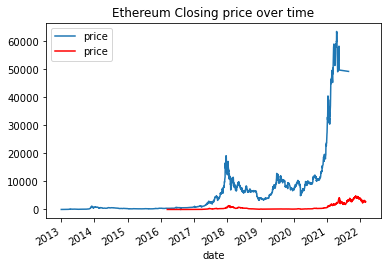

In [232]:
fig = px.line(df_bitcoin_pred, x="date", y="price", title='Bitcoin Closing price over time')

fig1 = px.line(df_ether_pred, x="date", y="price", title='Ethereum Closing price over time')
fig.show()
fig1.show()

ax = plt.gca()

df_bitcoin_pred.plot(kind='line',x='date',y='price',ax=ax, title='Bitcoin Closing price over time')
df_ether_pred.plot(kind='line',x='date',y='price', color='red', ax=ax, title='Ethereum Closing price over time')

plt.show()

In [233]:
# Making LSTM Model for Bitcoin

model_data = df_bitcoin_pred[['date','price']]

#Data Preprocessing

del model_data['date']

#scaler = MinMaxScaler(feature_range=(0,1))
#close_df = scaler.fit_transform(np.array(model_data).reshape(-1,1))
#close_df
#scaler = MinMaxScaler(feature_range=(0,1))
#close_df=scaler.fit_transform((model_data))

#Train and Test Split
close_df = np.array(model_data).reshape(-1,1)
#print(close_df)
training_size = int(len(close_df)*0.65)
test_size = len(close_df)-training_size

train_data,test_data = close_df[0:training_size,:],close_df[training_size:len(close_df),:1]
print('train_data_bitcoin: ', train_data.shape)
print('test_data_bitcoin: ', test_data.shape)




# Making LSTM Model for Ethereum
model_data_eth = df_ether_pred[['date','price']]

del model_data_eth['date']
#Train and Test Split
close_df_eth = np.array(model_data_eth).reshape(-1,1)
#print(close_df)
training_size_eth = int(len(close_df_eth)*0.65)
test_size_eth = len(close_df_eth)-training_size_eth

train_data_eth,test_data_eth = close_df_eth[0:training_size_eth,:],close_df_eth[training_size_eth:len(close_df_eth),:1]
print('train_data_ethereum: ', train_data_eth.shape)
print('test_data_ethereum: ', test_data_eth.shape)
print(train_data_eth)



train_data_bitcoin:  (1827, 1)
test_data_bitcoin:  (984, 1)
train_data_ethereum:  (1186, 1)
test_data_ethereum:  (639, 1)
[[2776.37]
 [2767.33]
 [2596.16]
 ...
 [ 377.99]
 [ 415.43]
 [ 385.5 ]]


In [234]:
#Bitcoin
#A function to add a time step below.
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10 
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print("X_train_Bitcoin: ", X_train.shape)
print("X_test_Bitcoin: ", X_test.shape)


#Ethereum
#A function to add a time step below.
# convert an array of values into a dataset matrix

X_train_eth, y_train_eth = create_dataset(train_data_eth, time_step)
X_test_eth, y_test_eth_eth = create_dataset(test_data_eth, time_step)


# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_eth = X_train_eth.reshape(X_train_eth.shape[0],X_train_eth.shape[1] , 1)
X_test_eth = X_test_eth.reshape(X_test_eth.shape[0],X_test_eth.shape[1] , 1)
print("X_train_Ethereum: ", X_train_eth.shape)
print("X_test_Ethereum: ", X_test_eth.shape)
#print(y_test_eth_eth)
#print(y_test)

#print(X_train_eth)


X_train_Bitcoin:  (1816, 10, 1)
X_test_Bitcoin:  (973, 10, 1)
X_train_Ethereum:  (1175, 10, 1)
X_test_Ethereum:  (628, 10, 1)


In [235]:
#Bitcoin
model = Sequential() 
# Adding a LSTM layer with 10 internal units
model.add(LSTM(10,input_shape=(None,1),activation='relu'))
# Adding a Dense layer with 1 units.
model.add(Dense(1))
# Loss function + optimizer
model.compile(loss='mean_squared_error',optimizer='adam')

#Ethereum
model_eth = Sequential()
# Adding a LSTM layer with 10 internal units
model_eth.add(LSTM(10,input_shape=(None,1),activation='relu'))
# Adding a Dense layer with 1 units.
model_eth.add(Dense(1))
# Loss function + optimizer
model_eth.compile(loss='mean_squared_error',optimizer='adam')

In [236]:
#Bitcoin
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=10, verbose = 0)
print ("--------------------------------------------------------------------------------------------------------------\n")
#Ethereum
history_eth = model_eth.fit(X_train_eth,y_train_eth,validation_data=(X_test_eth,y_test_eth_eth),epochs=100,batch_size=10, verbose=0)

--------------------------------------------------------------------------------------------------------------



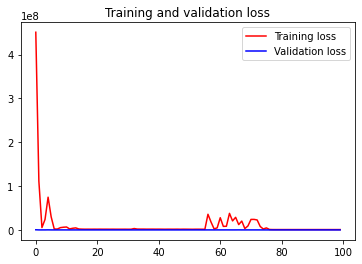

<Figure size 432x288 with 0 Axes>

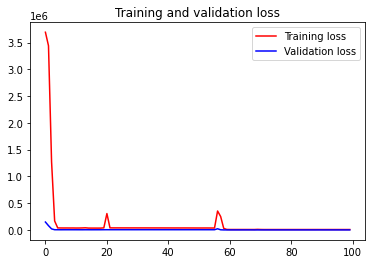

<Figure size 432x288 with 0 Axes>

In [237]:
#Bitcoin
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

#Ethereum
loss_eth = history_eth.history['loss']
val_loss_eth = history_eth.history['val_loss']
epochs_eth = range(len(loss_eth))
plt.plot(epochs_eth, loss_eth, 'r', label='Training loss')
plt.plot(epochs_eth, val_loss_eth, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [238]:
#print(np.max(X_test))

In [239]:
#Bitcoin
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
look_back=time_step
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_df)-1, :] = test_predict
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])
plotdf = pd.DataFrame({'date': df_bitcoin_pred['date'],
                       'original_close': df_bitcoin_pred['price'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'date'})

fig.update_layout(title_text='Comparision between original vs predicted close price for Bitcoin',
                  plot_bgcolor='white',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Ethereum
train_predict_eth=model_eth.predict(X_train_eth)
test_predict_eth=model_eth.predict(X_test_eth)
look_back_eth=time_step

trainPredictPlot_eth = np.empty_like(close_df_eth)
trainPredictPlot_eth[:, :] = np.nan
trainPredictPlot_eth[look_back:len(train_predict_eth)+look_back_eth, :] = train_predict_eth
# shift test predictions for plotting
testPredictPlot_eth = np.empty_like(close_df_eth)
testPredictPlot_eth[:, :] = np.nan
testPredictPlot_eth[len(train_predict_eth)+(look_back_eth*2)+1:len(close_df_eth)-1, :] = test_predict_eth
names_eth = cycle(['Original close price','Train predicted close price','Test predicted close price'])
plotdf_eth = pd.DataFrame({'date': df_ether_pred['date'],
                       'original_close': df_ether_pred['price'],
                      'train_predicted_close': trainPredictPlot_eth.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot_eth.reshape(1,-1)[0].tolist()})
fig_eth = px.line(plotdf_eth,x=plotdf_eth['date'], y=[plotdf_eth['original_close'],plotdf_eth['train_predicted_close'],
                                          plotdf_eth['test_predicted_close']],
              labels={'value':'Stock price','date': 'date'})

fig_eth.update_layout(title_text='Comparision between original vs predicted close price for Ethereum',
                  plot_bgcolor='white',legend_title_text='Close Price')
fig_eth.for_each_trace(lambda t:  t.update(name = next(names_eth)))
fig_eth.update_xaxes(showgrid=False)
fig_eth.update_yaxes(showgrid=False)
fig_eth.show()

In [240]:
#Bitcoin
print(len(test_data))

scaler1 = MinMaxScaler(feature_range = (0,1))
data_close = scaler1.fit_transform(np.array(train_data).reshape(-1,1))

x_input = test_data[974:].reshape(1,-1)
x_input.shape
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<60):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("For Bitcoin:{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

    

984
[21.228363]
For Bitcoin:1 day input [13.8        13.7        13.6        13.4        13.4        13.5
 13.4        13.3        13.3        21.22836304]
1 day output [[25.891375]]
For Bitcoin:2 day input [13.7        13.6        13.4        13.4        13.5        13.4
 13.3        13.3        21.22836304 25.89137459]
2 day output [[28.577608]]
For Bitcoin:3 day input [13.6        13.4        13.4        13.5        13.4        13.3
 13.3        21.22836304 25.89137459 28.57760811]
3 day output [[30.812214]]
For Bitcoin:4 day input [13.4        13.4        13.5        13.4        13.3        13.3
 21.22836304 25.89137459 28.57760811 30.8122139 ]
4 day output [[32.858597]]
For Bitcoin:5 day input [13.4        13.5        13.4        13.3        13.3        21.22836304
 25.89137459 28.57760811 30.8122139  32.8585968 ]
5 day output [[34.817265]]
For Bitcoin:6 day input [13.5        13.4        13.3        13.3        21.22836304 25.89137459
 28.57760811 30.8122139  32.8585968  34.81726

48 day output [[88.31398]]
For Bitcoin:49 day input [80.93789673 81.80825043 82.66500854 83.50847626 84.33906555 85.1572113
 85.96336365 86.75794983 87.54137421 88.3139801 ]
49 day output [[89.07627]]
For Bitcoin:50 day input [81.80825043 82.66500854 83.50847626 84.33906555 85.1572113  85.96336365
 86.75794983 87.54137421 88.3139801  89.07627106]
50 day output [[89.8286]]
For Bitcoin:51 day input [82.66500854 83.50847626 84.33906555 85.1572113  85.96336365 86.75794983
 87.54137421 88.3139801  89.07627106 89.82859802]
51 day output [[90.57133]]
For Bitcoin:52 day input [83.50847626 84.33906555 85.1572113  85.96336365 86.75794983 87.54137421
 88.3139801  89.07627106 89.82859802 90.57132721]
52 day output [[91.30471]]
For Bitcoin:53 day input [84.33906555 85.1572113  85.96336365 86.75794983 87.54137421 88.3139801
 89.07627106 89.82859802 90.57132721 91.30471039]
53 day output [[92.02902]]
For Bitcoin:54 day input [85.1572113  85.96336365 86.75794983 87.54137421 88.3139801  89.07627106
 89

In [241]:
#Ethereum
print(len(test_data_eth))

scaler_eth = MinMaxScaler(feature_range = (0,1))
data_close_eth = scaler_eth.fit_transform(np.array(train_data_eth).reshape(-1,1))

x_input_eth = test_data_eth[629:].reshape(1,-1)
x_input_eth.shape
temp_input_eth = list(x_input_eth)
temp_input_eth = temp_input_eth[0].tolist()

from numpy import array

lst_output_eth=[]
n_steps_eth=10
i=0
while(i<60):
    
    if(len(temp_input_eth)>10):
        #print(temp_input)
        x_input_eth=np.array(temp_input_eth[1:])
        print("For Ethereum:{} day input {}".format(i,x_input_eth))
        x_input_eth=x_input_eth.reshape(1,-1)
        x_input_eth = x_input_eth.reshape((1, n_steps_eth, 1))
        #print(x_input)
        yhat_eth = model_eth.predict(x_input_eth, verbose=0)
        print("{} day output {}".format(i,yhat_eth))
        temp_input_eth.extend(yhat_eth[0].tolist())
        temp_input_eth=temp_input_eth[1:]
        #print(temp_input)
        lst_output_eth.extend(yhat_eth.tolist())
        i=i+1
    else:
        x_input_eth = x_input_eth.reshape((1, n_steps_eth,1))
        yhat_eth = model_eth.predict(x_input_eth, verbose=0)
        print(yhat_eth[0])
        temp_input_eth.extend(yhat_eth[0].tolist())
        lst_output_eth.extend(yhat_eth.tolist())
        i=i+1

639
[10.18299]
For Ethereum:1 day input [10.74       10.74       12.88       13.06       12.5        15.07
 12.92       11.95       11.75       10.18299007]
1 day output [[9.515444]]
For Ethereum:2 day input [10.74       12.88       13.06       12.5        15.07       12.92
 11.95       11.75       10.18299007  9.5154438 ]
2 day output [[8.468569]]
For Ethereum:3 day input [12.88       13.06       12.5        15.07       12.92       11.95
 11.75       10.18299007  9.5154438   8.4685688 ]
3 day output [[7.5293875]]
For Ethereum:4 day input [13.06       12.5        15.07       12.92       11.95       11.75
 10.18299007  9.5154438   8.4685688   7.52938747]
4 day output [[7.648036]]
For Ethereum:5 day input [12.5        15.07       12.92       11.95       11.75       10.18299007
  9.5154438   8.4685688   7.52938747  7.648036  ]
5 day output [[8.128807]]
For Ethereum:6 day input [15.07       12.92       11.95       11.75       10.18299007  9.5154438
  8.4685688   7.52938747  7.648036    8.1

48 day output [[108.76813]]
For Ethereum:49 day input [100.73218536 101.76032257 102.74723816 103.6966629  104.61194611
 105.49599457 106.35144043 107.18060303 107.98553467 108.76812744]
49 day output [[109.53005]]
For Ethereum:50 day input [101.76032257 102.74723816 103.6966629  104.61194611 105.49599457
 106.35144043 107.18060303 107.98553467 108.76812744 109.53005219]
50 day output [[110.27284]]
For Ethereum:51 day input [102.74723816 103.6966629  104.61194611 105.49599457 106.35144043
 107.18060303 107.98553467 108.76812744 109.53005219 110.27284241]
51 day output [[110.99784]]
For Ethereum:52 day input [103.6966629  104.61194611 105.49599457 106.35144043 107.18060303
 107.98553467 108.76812744 109.53005219 110.27284241 110.99784088]
52 day output [[111.706375]]
For Ethereum:53 day input [104.61194611 105.49599457 106.35144043 107.18060303 107.98553467
 108.76812744 109.53005219 110.27284241 110.99784088 111.70637512]
53 day output [[112.39954]]
For Ethereum:54 day input [105.49599

In [242]:
#Bitcoin
print("Bitcoin")
print(lst_output)
print("\n")
print("Ethereum")
#Ethereum
print(lst_output_eth)

Bitcoin
[[21.228363037109375], [25.891374588012695], [28.577608108520508], [30.812213897705078], [32.85859680175781], [34.817264556884766], [36.698753356933594], [38.44178771972656], [40.07444763183594], [42.30414581298828], [44.601619720458984], [46.62323760986328], [48.470184326171875], [50.21391296386719], [51.865928649902344], [53.44093322753906], [54.9488410949707], [56.39185333251953], [57.77299118041992], [59.170570373535156], [60.56452178955078], [61.91265106201172], [63.21169662475586], [64.4686050415039], [65.68707275390625], [66.8702392578125], [68.0207290649414], [69.14045715332031], [70.23078918457031], [71.30128479003906], [72.35397338867188], [73.38581085205078], [74.39604949951172], [75.3855209350586], [76.35517883300781], [77.30597686767578], [78.23881530761719], [79.15447235107422], [80.05364227294922], [80.93789672851562], [81.8082504272461], [82.66500854492188], [83.50847625732422], [84.33906555175781], [85.15721130371094], [85.96336364746094], [86.75794982910156], 

In [243]:
#Utilise the model for future predictions for the next 60 days.
pred_days=60
temp_mat = np.empty(pred_days+1)
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

next_predicted_days_value = temp_mat

next_predicted_days_value = (np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'Predicted Close':next_predicted_days_value
})

names = cycle(['Predicted next 60 days close price for Bitcoin'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y= new_pred_plot['Predicted Close'],
              labels={'value': 'Stock price','index': 'Timestamp'})

fig.update_layout(title_text='Next 60 days Closing price prediction for Bitcoin',
                  plot_bgcolor='white',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [244]:
#Ethereum
temp_mat_eth = np.empty(pred_days+1)
temp_mat_eth[:] = np.nan
temp_mat_eth = temp_mat_eth.reshape(1,-1).tolist()[0]

next_predicted_days_value_eth = temp_mat_eth

next_predicted_days_value_eth = (np.array(lst_output_eth).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot_eth = pd.DataFrame({
    'Predicted Close':next_predicted_days_value_eth
})

names = cycle(['Predicted next 60 days close price for Ethereum'])

fig_eth = px.line(new_pred_plot_eth,x=new_pred_plot_eth.index, y= new_pred_plot_eth['Predicted Close'],
              labels={'value': 'Stock price','index': 'Timestamp'})

fig_eth.update_layout(title_text='Next 60 days Closing price prediction for Ethereum',
                  plot_bgcolor='white',legend_title_text='Close Price')

fig_eth.for_each_trace(lambda t:  t.update(name = next(names)))
fig_eth.update_xaxes(showgrid=False)
fig_eth.update_yaxes(showgrid=False)
fig_eth.show()


